In [15]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchsummary import summary
import numpy as np

print("==> Check devices..")
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Current device: ",device)

#Also can print your current GPU id, and the number of GPUs you can use.
print("Our selected device: ", torch.cuda.current_device())
print(torch.cuda.device_count(), " GPUs is available")

==> Check devices..
Current device:  cuda
Our selected device:  0
1  GPUs is available


## Preparing dataset

In [2]:
#The transform function for train data
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

#The transform function for test data
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

#Use API to load CIFAR10 train dataset
trainset = torchvision.datasets.CIFAR10(root='D:\\dataset\\cifar10', train=True, download=False, transform=transform_train)

#Use API to load CIFAR10 test dataset
testset = torchvision.datasets.CIFAR10(root='D:\\dataset\\cifar10', train=False, download=False, transform=transform_test)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=32,
shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

## Biuld Model

In [3]:
class Net(nn.Module):

    #define the layers
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.relu = nn.ReLU()
        
    #concatenate these layers
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [4]:
# declare a new model
net = Net()
# change all model tensor into cuda type
# something like weight & bias are the tensor 
net = net.to(device)
print(net)
summary(net, (3, 32, 32))

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (relu): ReLU()
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
              ReLU-2            [-1, 6, 28, 28]               0
         MaxPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              ReLU-5           [-1, 16, 10, 10]               0
         MaxPool2d-6             [-1, 16, 5, 5]               0
            Linear-7                  [-1, 120]          48,120
            

## Define Loss function and optimizor

In [5]:
#loss function
criterion = nn.CrossEntropyLoss()
#optimization algorithm
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Train the network

In [6]:
net.train()

for epoch in range(25):  # loop over the dataset multiple times
    running_loss = 0.0
    correct = 0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        
        #change the type into cuda tensor 
        inputs = inputs.to(device) 
        labels = labels.to(device) 

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        # select the class with highest probability
        _, pred = outputs.max(1)
        # if the model predicts the same results as the true
        # label, then the correct counter will plus 1
        correct += pred.eq(labels).sum().item()
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0
    print('%d epoch, training accuracy: %.4f' % (epoch+1, 100.*correct/len(trainset)))
print('Finished Training')

[1,   200] loss: 2.301
[1,   400] loss: 2.290
[1,   600] loss: 2.243
[1,   800] loss: 2.097
[1,  1000] loss: 1.996
[1,  1200] loss: 1.946
[1,  1400] loss: 1.899
1 epoch, training accuracy: 22.5040
[2,   200] loss: 1.795
[2,   400] loss: 1.747
[2,   600] loss: 1.715
[2,   800] loss: 1.708
[2,  1000] loss: 1.677
[2,  1200] loss: 1.678
[2,  1400] loss: 1.642
2 epoch, training accuracy: 37.2720
[3,   200] loss: 1.614
[3,   400] loss: 1.595
[3,   600] loss: 1.597
[3,   800] loss: 1.588
[3,  1000] loss: 1.569
[3,  1200] loss: 1.540
[3,  1400] loss: 1.545
3 epoch, training accuracy: 42.1780
[4,   200] loss: 1.529
[4,   400] loss: 1.519
[4,   600] loss: 1.501
[4,   800] loss: 1.486
[4,  1000] loss: 1.490
[4,  1200] loss: 1.480
[4,  1400] loss: 1.459
4 epoch, training accuracy: 45.3560
[5,   200] loss: 1.439
[5,   400] loss: 1.467
[5,   600] loss: 1.452
[5,   800] loss: 1.437
[5,  1000] loss: 1.412
[5,  1200] loss: 1.411
[5,  1400] loss: 1.425
5 epoch, training accuracy: 47.8900
[6,   200] loss

[41,   800] loss: 0.959
[41,  1000] loss: 0.934
[41,  1200] loss: 0.942
[41,  1400] loss: 0.937
41 epoch, training accuracy: 66.7240
[42,   200] loss: 0.953
[42,   400] loss: 0.936
[42,   600] loss: 0.944
[42,   800] loss: 0.956
[42,  1000] loss: 0.956
[42,  1200] loss: 0.941
[42,  1400] loss: 0.940
42 epoch, training accuracy: 66.6020
[43,   200] loss: 0.934
[43,   400] loss: 0.932
[43,   600] loss: 0.936
[43,   800] loss: 0.942
[43,  1000] loss: 0.926
[43,  1200] loss: 0.943
[43,  1400] loss: 0.923
43 epoch, training accuracy: 66.8960
[44,   200] loss: 0.937
[44,   400] loss: 0.937
[44,   600] loss: 0.914
[44,   800] loss: 0.945
[44,  1000] loss: 0.955
[44,  1200] loss: 0.917
[44,  1400] loss: 0.939
44 epoch, training accuracy: 67.1900
[45,   200] loss: 0.910
[45,   400] loss: 0.943
[45,   600] loss: 0.937
[45,   800] loss: 0.964
[45,  1000] loss: 0.921
[45,  1200] loss: 0.929
[45,  1400] loss: 0.907
45 epoch, training accuracy: 67.3520
[46,   200] loss: 0.930
[46,   400] loss: 0.924

## Save model

In [7]:
#only save model parameters
torch.save(net.state_dict(), './checkpoint.t7')
#you also can store some log information
state = {
    'net': net.state_dict(),
    'acc': 100.*correct/len(trainset),
    'epoch': 75
}
torch.save(state, './checkpoint.t7')

#save entire model
torch.save(net, './model.pt')

C:\Users\astor\Anaconda3\envs\ec_final\lib\site-packages\torch\serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


## Test the network

In [6]:
print('==> Loading model..')

#If you just save the model parameters, you
#need to redefine the model architecture, and
#load the parameters into your model
net = Net()
checkpoint = torch.load('./checkpoint.t7')
net.load_state_dict(checkpoint['net'])

#If you save the entire model
net = torch.load('./model.pt')

print('Finished Loading')

==> Loading model..
Finished Loading


In [7]:
print('==> Testing model..')
net.eval()

# change model to cuda tensor
# or it will raise when images and labels are all cuda tensor type
net = net.to(device)
correct = 0
running_loss = 0.0
iter_count = 0
class_correct = [0 for i in range(10)]
class_total = [0 for i in range(10)]
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device) 
        labels = labels.to(device)
        outputs = net(images)
        _, pred = outputs.max(1)
        correct += pred.eq(labels).sum().item()
        c_eachlabel = pred.eq(labels).squeeze()
        loss = criterion(outputs, labels)
        iter_count += 1
        running_loss += loss.item()
        for i in range(len(labels)):# 32 is batch size
            cur_label = labels[i]
            class_correct[cur_label] += c_eachlabel[i].item()
            class_total[cur_label] += 1

print('Total accuracy is: {:4f}% and loss is: {:3.3f}'.format(100 * correct/len(testset), running_loss/iter_count))
print('For each class in cifar 10:')
for i in range(10):
    print('Accruacy for {:5s}: {:4.2f}%'.format(classes[i], 100 * class_correct[i]/class_total[i]))

==> Testing model..
Total accuracy is: 69.510000% and loss is: 0.879
For each class in cifar 10:
Accruacy for plane: 67.80%
Accruacy for car  : 86.10%
Accruacy for bird : 64.00%
Accruacy for cat  : 48.40%
Accruacy for deer : 63.90%
Accruacy for dog  : 45.20%
Accruacy for frog : 80.70%
Accruacy for horse: 75.20%
Accruacy for ship : 84.00%
Accruacy for truck: 79.80%


## Check model weight

In [40]:
# test block
# covn1
w_conv1 = net.conv1.weight.cpu().detach().numpy()
w_conv1_1d = w_conv1.flatten()
b_conv1 = net.conv1.bias.cpu().detach().numpy()
b_conv1_1d = b_conv1.flatten()

#conv2
w_conv2 = net.conv2.weight.cpu().detach().numpy()
w_conv2_1d = w_conv2.flatten()
b_conv2 = net.conv2.bias.cpu().detach().numpy()
b_conv2_1d = b_conv2.flatten()

#fc1
w_fc1 = net.fc1.weight.cpu().detach().numpy()
w_fc1_1d = w_fc1.flatten()
b_fc1 = net.fc1.bias.cpu().detach().numpy()
b_fc1_1d = b_fc1.flatten()

#fc2
w_fc2 = net.fc2.weight.cpu().detach().numpy()
w_fc2_1d = w_fc2.flatten()
b_fc2 = net.fc2.bias.cpu().detach().numpy()
b_fc2_1d = b_fc2.flatten()

#fc3
w_fc3 = net.fc3.weight.cpu().detach().numpy()
w_fc3_1d = w_fc3.flatten()
b_fc3 = net.fc3.bias.cpu().detach().numpy()
b_fc3_1d = b_fc3.flatten()

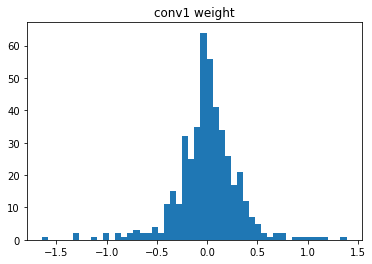

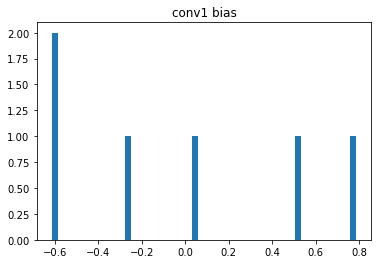

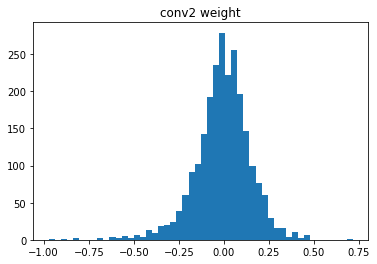

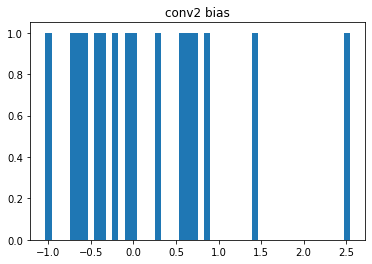

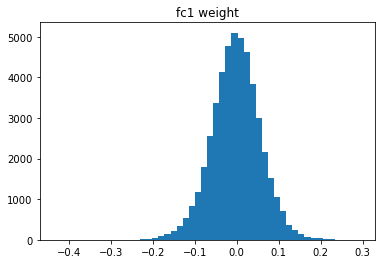

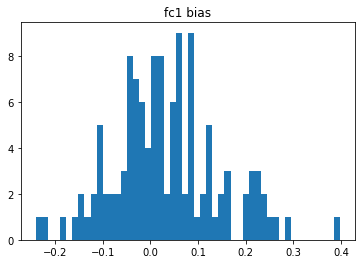

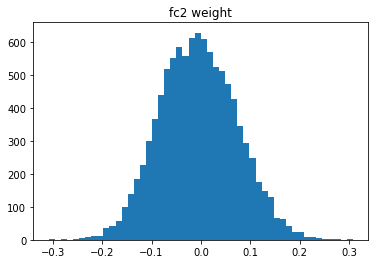

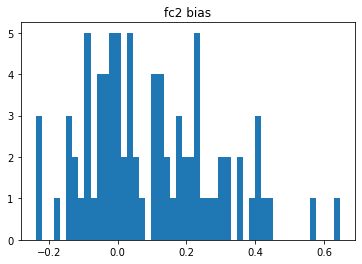

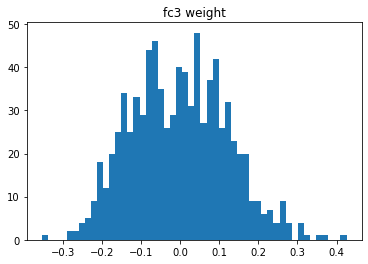

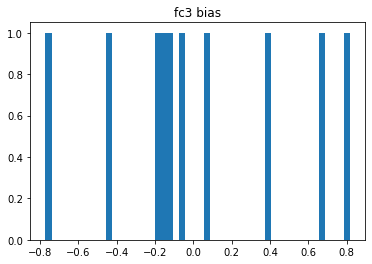

In [42]:
import matplotlib.pyplot as plt
plt.title("conv1 weight")
plt.hist(w_conv1_1d, bins=50)
plt.show()

plt.title("conv1 bias")
plt.hist(b_conv1_1d, bins=50)
plt.show()
##
plt.title("conv2 weight")
plt.hist(w_conv2_1d, bins=50)
plt.show()

plt.title("conv2 bias")
plt.hist(b_conv2_1d, bins=50)
plt.show()
##
plt.title("fc1 weight")
plt.hist(w_fc1_1d, bins=50)
plt.show()

plt.title("fc1 bias")
plt.hist(b_fc1_1d, bins=50)
plt.show()
##
plt.title("fc2 weight")
plt.hist(w_fc2_1d, bins=50)
plt.show()

plt.title("fc2 bias")
plt.hist(b_fc2_1d, bins=50)
plt.show()
##
plt.title("fc3 weight")
plt.hist(w_fc3_1d, bins=50)
plt.show()

plt.title("fc3 bias")
plt.hist(b_fc3_1d, bins=50)
plt.show()

## How to assign weight

In [20]:
import numpy as np

w_conv1 = net.conv1.weight.cpu().detach().numpy()
w_conv2 = net.conv2.weight.cpu().detach().numpy()
print(w_conv1.shape)
print(w_conv2.shape)
print(w_conv1[0,0])
print(w_conv2[0,0])

(6, 3, 5, 5)
(16, 6, 5, 5)
[[-0.27955812  0.07581276  0.31300315  0.37746924  0.05065257]
 [-0.22238143 -0.06729724  0.10940314  0.33792654  0.00484863]
 [ 0.18700233 -0.27351144 -0.24898307  0.30765262  0.2925266 ]
 [ 0.377572    0.1749983  -0.23899823 -0.19275564  0.15815015]
 [ 0.05819996  0.14855497  0.09384672 -0.21884891 -0.24898854]]
[[ 0.06914287 -0.12230839 -0.17888683 -0.06831404  0.00920798]
 [-0.09570708  0.07521028 -0.09755232  0.03551797 -0.19114684]
 [-0.13640554 -0.16031213 -0.32167584 -0.11003265 -0.28224778]
 [-0.10589303 -0.03873828 -0.2086547  -0.07199035 -0.23553443]
 [ 0.02993375  0.0634709  -0.03962136 -0.02366441 -0.1448262 ]]


In [21]:
with torch.no_grad():
    net.conv1.weight[0, 0, 0, 0] = 0.0
print(net.conv1.weight.cpu().detach().numpy()[0,0])

[[ 0.          0.07581276  0.31300315  0.37746924  0.05065257]
 [-0.22238143 -0.06729724  0.10940314  0.33792654  0.00484863]
 [ 0.18700233 -0.27351144 -0.24898307  0.30765262  0.2925266 ]
 [ 0.377572    0.1749983  -0.23899823 -0.19275564  0.15815015]
 [ 0.05819996  0.14855497  0.09384672 -0.21884891 -0.24898854]]


In [22]:
net.conv1.weight[0,0] = net.conv2.weight[0,0]
print(net.conv1.weight.cpu().detach().numpy()[0,0])
print(net.conv2.weight.cpu().detach().numpy()[0,0])

[[ 0.06914287 -0.12230839 -0.17888683 -0.06831404  0.00920798]
 [-0.09570708  0.07521028 -0.09755232  0.03551797 -0.19114684]
 [-0.13640554 -0.16031213 -0.32167584 -0.11003265 -0.28224778]
 [-0.10589303 -0.03873828 -0.2086547  -0.07199035 -0.23553443]
 [ 0.02993375  0.0634709  -0.03962136 -0.02366441 -0.1448262 ]]
[[ 0.06914287 -0.12230839 -0.17888683 -0.06831404  0.00920798]
 [-0.09570708  0.07521028 -0.09755232  0.03551797 -0.19114684]
 [-0.13640554 -0.16031213 -0.32167584 -0.11003265 -0.28224778]
 [-0.10589303 -0.03873828 -0.2086547  -0.07199035 -0.23553443]
 [ 0.02993375  0.0634709  -0.03962136 -0.02366441 -0.1448262 ]]


In [26]:
net.conv1.weight[0,0] = torch.from_numpy(np.array(
[[-0.27955812,  0.07581276,  0.31300315,  0.37746924,  0.05065257],
 [-0.22238143, -0.06729724,  0.10940314,  0.33792654,  0.00484863],
 [ 0.18700233, -0.27351144, -0.24898307,  0.30765262,  0.2925266 ],
 [ 0.377572,    0.1749983,  -0.23899823, -0.19275564,  0.15815015],
 [ 0.05819996,  0.14855497,  0.09384672, -0.21884891, -0.24898854]]))
print(net.conv1.weight.cpu().detach().numpy()[0,0])

[[-0.27955812  0.07581276  0.31300315  0.37746924  0.05065257]
 [-0.22238143 -0.06729724  0.10940314  0.33792654  0.00484863]
 [ 0.18700233 -0.27351144 -0.24898307  0.30765262  0.2925266 ]
 [ 0.377572    0.1749983  -0.23899823 -0.19275564  0.15815015]
 [ 0.05819996  0.14855497  0.09384672 -0.21884891 -0.24898854]]


In [27]:
print('==> Testing model..')
net.eval()

# change model to cuda tensor
# or it will raise when images and labels are all cuda tensor type
net = net.to(device)
correct = 0
running_loss = 0.0
iter_count = 0
class_correct = [0 for i in range(10)]
class_total = [0 for i in range(10)]
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device) 
        labels = labels.to(device)
        outputs = net(images)
        _, pred = outputs.max(1)
        correct += pred.eq(labels).sum().item()
        c_eachlabel = pred.eq(labels).squeeze()
        loss = criterion(outputs, labels)
        iter_count += 1
        running_loss += loss.item()
        for i in range(len(labels)):# 32 is batch size
            cur_label = labels[i]
            class_correct[cur_label] += c_eachlabel[i].item()
            class_total[cur_label] += 1

print('Total accuracy is: {:4f}% and loss is: {:3.3f}'.format(100 * correct/len(testset), running_loss/iter_count))
print('For each class in cifar 10:')
for i in range(10):
    print('Accruacy for {:5s}: {:4.2f}%'.format(classes[i], 100 * class_correct[i]/class_total[i]))

==> Testing model..
Total accuracy is: 69.510000% and loss is: 0.879
For each class in cifar 10:
Accruacy for plane: 67.80%
Accruacy for car  : 86.10%
Accruacy for bird : 64.00%
Accruacy for cat  : 48.40%
Accruacy for deer : 63.90%
Accruacy for dog  : 45.20%
Accruacy for frog : 80.70%
Accruacy for horse: 75.20%
Accruacy for ship : 84.00%
Accruacy for truck: 79.80%


## Genatic Algorithm

In [10]:
POPULATION_SIZE = 100
SELECTION = {
    0:'ROULETTE',
    1:'TOURNAMENT'
}
CROSSOVER = {
    0:'UNIFORM',
    1:'ONEPOINT',
    2:'TWOPOINT'
}
CROSSOVER_STEPS = 100
GENERATIONS = 2000
SELECT_METHOD = SELECTION[1]
CROSSOVER_METHOD = CROSSOVER[0]
TOURNAMENT_SIZE = 5

In [11]:
def testInd(ind):
    ind.eval()
    ind = ind.to(device)
    correct = 0
    running_loss = 0.0
    iter_count = 0
    class_correct = [0 for i in range(10)]
    class_total = [0 for i in range(10)]
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device) 
            labels = labels.to(device)
            outputs = ind(images)
            _, pred = outputs.max(1)
            correct += pred.eq(labels).sum().item()
            c_eachlabel = pred.eq(labels).squeeze()
            loss = criterion(outputs, labels)
            iter_count += 1
            running_loss += loss.item()
            for i in range(len(labels)):# 32 is batch size
                cur_label = labels[i]
                class_correct[cur_label] += c_eachlabel[i].item()
                class_total[cur_label] += 1
    return 100 * correct/len(testset)

In [12]:
models = []
fitness = []
for i in range(POPULATION_SIZE):
    models.append(Net())

In [13]:
with torch.no_grad():
    for ind in models:
        fitness.append(testInd(ind))
    print(fitness)

[10.64, 9.81, 9.98, 10.08, 9.97, 10.88, 10.41, 10.0, 8.89, 10.13, 10.05, 9.35, 10.66, 10.09, 9.44, 9.84, 9.05, 7.61, 9.53, 9.83, 10.04, 10.02, 10.01, 9.98, 7.41, 10.22, 10.0, 7.83, 9.43, 10.0, 11.19, 9.84, 8.67, 9.99, 12.94, 10.3, 9.86, 10.02, 9.95, 13.19, 11.33, 9.75, 10.18, 9.94, 9.9, 10.01, 11.91, 8.0, 6.86, 10.93, 10.16, 10.18, 10.15, 9.78, 10.07, 10.05, 9.69, 10.06, 10.42, 9.34, 10.37, 10.76, 9.95, 9.14, 9.78, 8.57, 10.08, 8.26, 9.99, 10.27, 10.0, 10.0, 10.71, 11.24, 9.25, 9.57, 8.11, 9.97, 11.4, 10.0, 9.98, 9.46, 9.11, 9.64, 8.68, 10.0, 10.27, 10.56, 9.76, 9.96, 10.01, 10.83, 9.78, 10.0, 10.06, 10.26, 9.49, 11.97, 10.0, 10.02]


In [24]:
for gen in range(1, GENERATIONS+1):
    # ======================= #
    #     Crossover Phase     #
    # ======================= #
    
    with torch.no_grad():
        # parents selection
        if SELECT_METHOD == 'ROULETTE':
            pass
        elif SELECT_METHOD == 'TOURNAMENT':
            fathers = []
            mothers = []
            for pair in range(POPULATION_SIZE//2):
                f = np.random.choice(POPULATION_SIZE, size=(TOURNAMENT_SIZE), replace=False)
                m = np.random.choice(POPULATION_SIZE, size=(TOURNAMENT_SIZE), replace=False)
                f_fitness = 0
                m_fitness = 0
                father = 0
                mother = 0
                for i in range(TOURNAMENT_SIZE):
                    if f_fitness < fitness[f[i]]:
                        f_fitness = fitness[f[i]]
                        father = f[i]
                    if f_fitness < fitness[m[i]]:
                        f_fitness = fitness[m[i]]
                        mother = m[i]
                fathers.append(father)
                mothers.append(mother)

        # crossover
        children = []
        if CROSSOVER_METHOD == 'UNIFORM':
            for father, mother in zip(fathers, mothers):
                mask = np.random.choice([False, True], size=(5))
                child1 = Net()
                child2 = Net()
                
                child1.conv1.weight = models[father].conv1.weight if mask[0] else models[mother].conv1.weight
                child1.conv1.bias   = models[father].conv1.bias   if mask[0] else models[mother].conv1.bias
                child2.conv1.weight = models[mother].conv1.weight if mask[0] else models[father].conv1.weight
                child2.conv1.bias   = models[mother].conv1.bias   if mask[0] else models[father].conv1.bias
                
                child1.conv2.weight = models[father].conv2.weight if mask[1] else models[mother].conv2.weight
                child1.conv2.bias   = models[father].conv2.bias   if mask[1] else models[mother].conv2.bias
                child2.conv2.weight = models[mother].conv2.weight if mask[1] else models[father].conv2.weight
                child2.conv2.bias   = models[mother].conv2.bias   if mask[1] else models[father].conv2.bias
                
                child1.fc1.weight = models[father].fc1.weight if mask[2] else models[mother].fc1.weight
                child1.fc1.bias   = models[father].fc1.bias   if mask[2] else models[mother].fc1.bias
                child2.fc1.weight = models[mother].fc1.weight if mask[2] else models[father].fc1.weight
                child2.fc1.bias   = models[mother].fc1.bias   if mask[2] else models[father].fc1.bias
                
                child1.fc2.weight = models[father].fc2.weight if mask[3] else models[mother].fc2.weight
                child1.fc2.bias   = models[father].fc2.bias   if mask[3] else models[mother].fc2.bias
                child2.fc2.weight = models[mother].fc2.weight if mask[3] else models[father].fc2.weight
                child2.fc2.bias   = models[mother].fc2.bias   if mask[3] else models[father].fc2.bias
                
                child1.fc3.weight = models[father].fc3.weight if mask[4] else models[mother].fc3.weight
                child1.fc3.bias   = models[father].fc3.bias   if mask[4] else models[mother].fc3.bias
                child2.fc3.weight = models[mother].fc3.weight if mask[4] else models[father].fc3.weight
                child2.fc3.bias   = models[mother].fc3.bias   if mask[4] else models[father].fc3.bias
                
                children.append(child1)
                children.append(child2)

        elif CROSSOVER_METHOD == 'ONEPOINT':
            pass
        elif CROSSOVER_METHOD == 'TWOPOINT':
            pass

        # replacment
        if True:
            del models
            torch.cuda.empty_cache()
            models = children
    
    if gen % CROSSOVER_STEPS == 0:
        # ====================== #
        #     Mutation Phase     #
        # ====================== #
        
        for idx, ind in enumerate(models):
            running_loss = 0.0
            correct = 0
            for i, (inputs, labels) in enumerate(trainloader, 0):

                inputs = inputs.to(device) 
                labels = labels.to(device) 

                optimizer.zero_grad()

                outputs = ind(inputs)
                _, pred = outputs.max(1)
                correct += pred.eq(labels).sum().item()

                loss = criterion(outputs, labels)

                loss.backward()
                optimizer.step()

                # print statistics
                running_loss += loss.item()
                if i % 200 == 199:
                    print('[{}, {:5d}] loss: {:.3f}'.format(idx, i + 1, running_loss / 200))
                    running_loss = 0.0
            print('Model {} training accuracy: {:.4f}'.format(idx, 100.*correct/len(trainset)))
            
    with torch.no_grad():
        # update fitness list
        for ind in models:
            fitness.append(testInd(ind))
        print(fitness)

KeyboardInterrupt: 